In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Descriptive Analytics


In [ ]:
data = pd.read_csv(r'College_Data.csv')
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
# Output file

import matplotlib.backends.backend_pdf as pdf_backend

pdf_filename = 'output_report.pdf'
pdf_pages = pdf_backend.PdfPages(pdf_filename)

In [ ]:
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


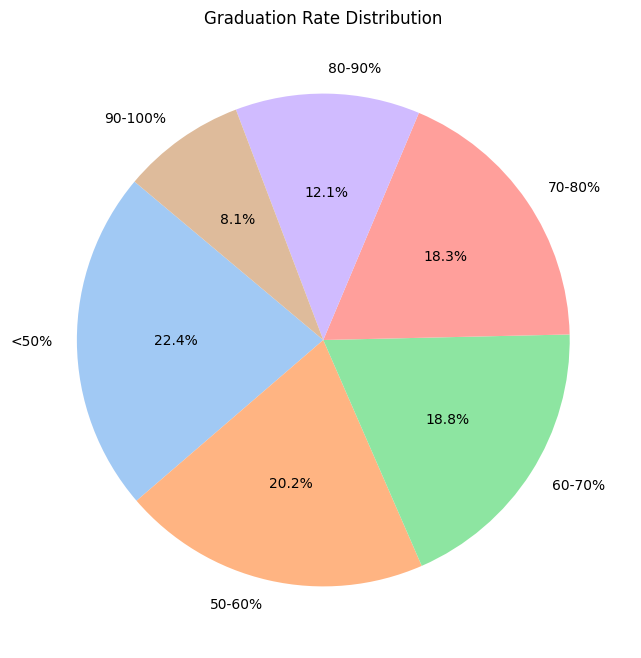

In [ ]:
# Visualize the graduation rate distribution (Descriptive)
plt.figure(figsize=(8, 8))
labels = ['<50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%']
bins = [0, 50, 60, 70, 80, 90, 100]
data['Grad.Rate_Bin'] = pd.cut(data['Grad.Rate'], bins=bins, labels=labels)
sizes = data['Grad.Rate_Bin'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Graduation Rate Distribution')
pdf_pages.savefig()
plt.show()

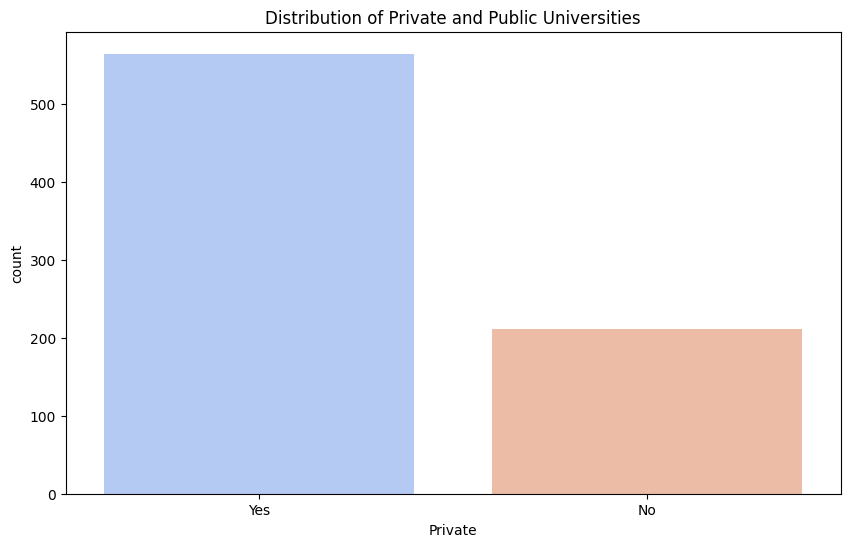

In [ ]:
# Visualize the distribution of public and private universities (Descriptive )
plt.figure(figsize=(10, 6))
sns.countplot(x='Private', data=data, palette='coolwarm')
plt.title('Distribution of Private and Public Universities')
pdf_pages.savefig()
plt.show()

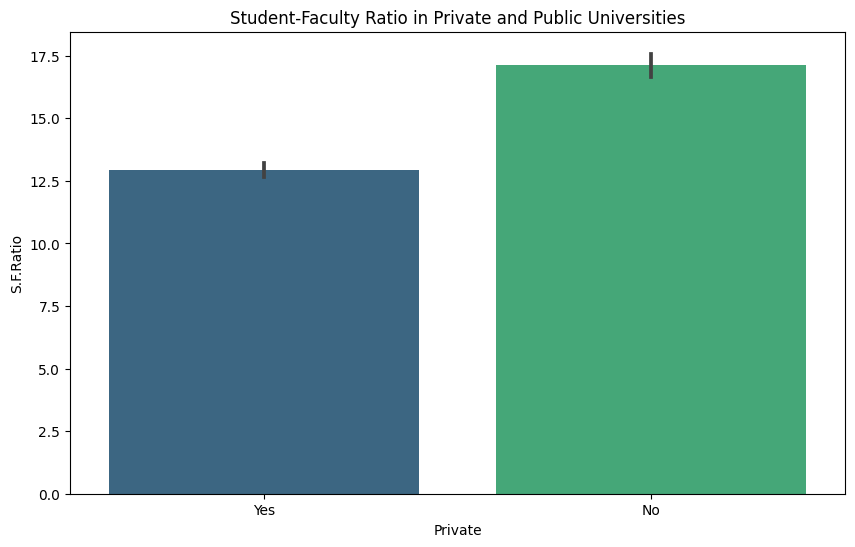

In [ ]:
# Visualize the student-faculty ratio in public and private universities (Descriptive)
plt.figure(figsize=(10, 6))
sns.barplot(x='Private', y='S.F.Ratio', data=data, palette='viridis')
plt.title('Student-Faculty Ratio in Private and Public Universities')
pdf_pages.savefig()
plt.show()

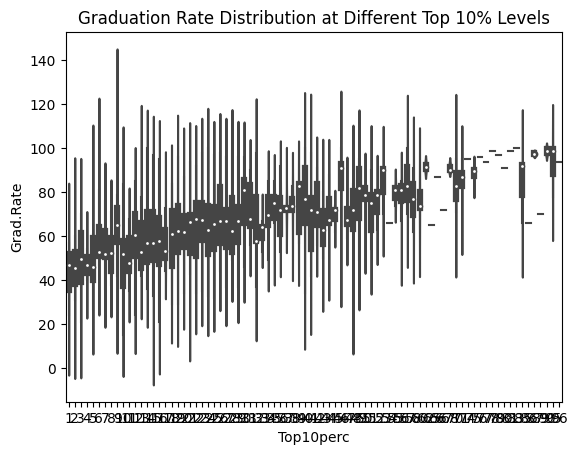

In [ ]:
# Graduation Rate Distribution at Different Top 10% Levels
# Assuming 'data' is your DataFrame containing 'Top10perc' and 'Grad.Rate' columns
sns.violinplot(x='Top10perc', y='Grad.Rate', data=data)

# Adding a title to the plot
plt.title('Graduation Rate Distribution at Different Top 10% Levels')

# Save to output file
pdf_pages.savefig()

# Display the plot
plt.show()

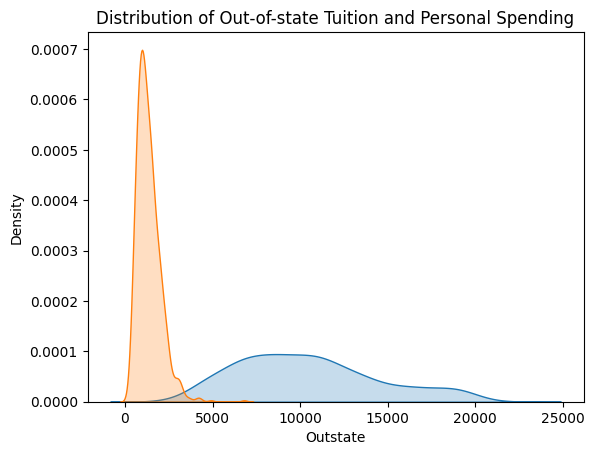

In [ ]:
# Distribution of Out-of-state Tuition and Personal Spending

sns.kdeplot(data['Outstate'], label='Outstate Tuition', shade=True)
sns.kdeplot(data['Personal'], label='Personal Spending', shade=True)
plt.title('Distribution of Out-of-state Tuition and Personal Spending')
pdf_pages.savefig()

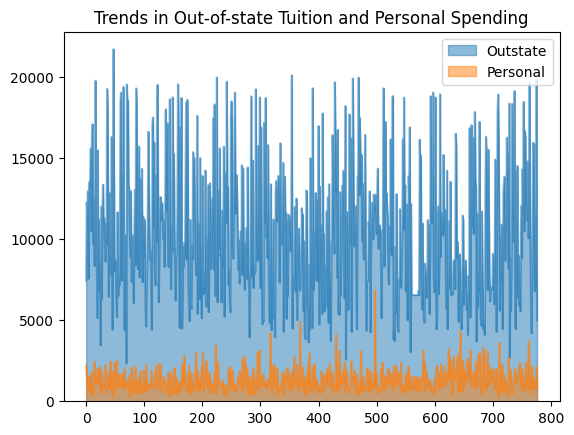

In [ ]:
# Trends in Out-of-state Tuition and Personal Spending

data[['Outstate', 'Personal']].plot(kind='area', stacked=False)
plt.title('Trends in Out-of-state Tuition and Personal Spending')
pdf_pages.savefig()

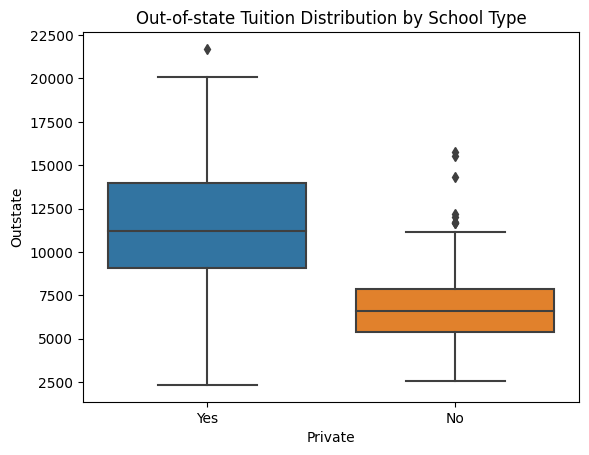

In [ ]:
#7)Out-of-state Tuition Distribution by School Type
sns.boxplot(x='Private', y='Outstate', data=data)
plt.title('Out-of-state Tuition Distribution by School Type')
pdf_pages.savefig()

#Diagnostic Analytics


In [ ]:
!pip install catboost

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score,accuracy_score,roc_curve,auc
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     777 non-null    object  
 1   Private        777 non-null    object  
 2   Apps           777 non-null    int64   
 3   Accept         777 non-null    int64   
 4   Enroll         777 non-null    int64   
 5   Top10perc      777 non-null    int64   
 6   Top25perc      777 non-null    int64   
 7   F.Undergrad    777 non-null    int64   
 8   P.Undergrad    777 non-null    int64   
 9   Outstate       777 non-null    int64   
 10  Room.Board     777 non-null    int64   
 11  Books          777 non-null    int64   
 12  Personal       777 non-null    int64   
 13  PhD            777 non-null    int64   
 14  Terminal       777 non-null    int64   
 15  S.F.Ratio      777 non-null    float64 
 16  perc.alumni    777 non-null    int64   
 17  Expend         777 non-null    int6

In [ ]:
data.columns

Index(['Unnamed: 0', 'Private', 'Apps', 'Accept', 'Enroll', 'Top10perc',
       'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board',
       'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni',
       'Expend', 'Grad.Rate', 'Grad.Rate_Bin'],
      dtype='object')

In [ ]:
data

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Grad.Rate_Bin
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,50-60%
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,50-60%
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,50-60%
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,50-60%
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,<50%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40,<50%
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83,80-90%
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49,<50%
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99,90-100%


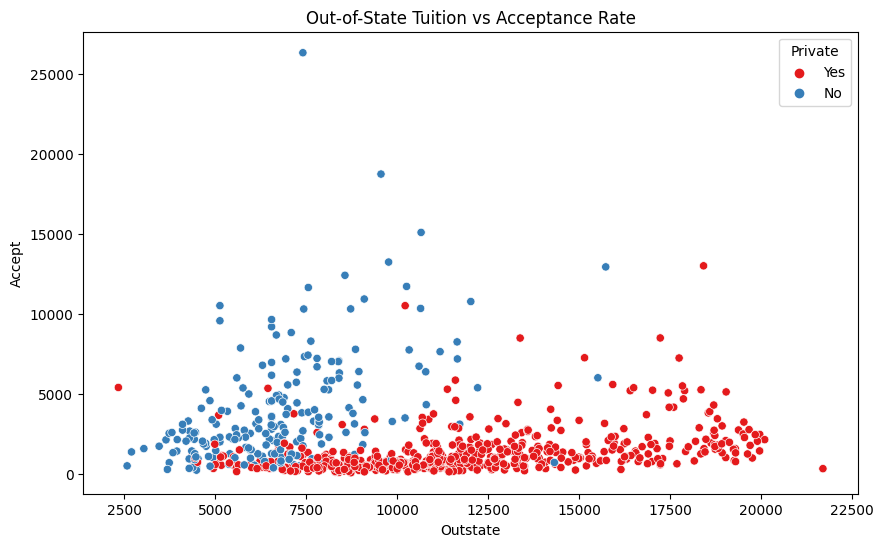

In [ ]:
# Create other visualizations for key factors/variables as needed
# Scatter plot for comparing Out-of-State Tuition and Acceptance Rate (Diagnostic)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Outstate', y='Accept', hue='Private', data=data, palette='Set1')
plt.title('Out-of-State Tuition vs Acceptance Rate')
pdf_pages.savefig()
plt.show()

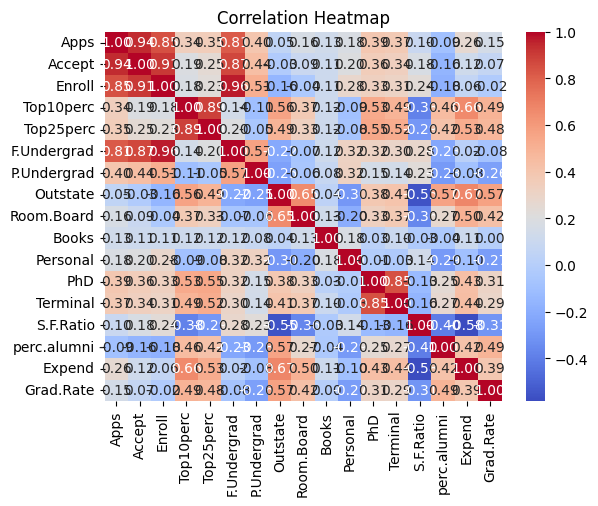

In [ ]:
# Correlation Heatmap

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
pdf_pages.savefig()

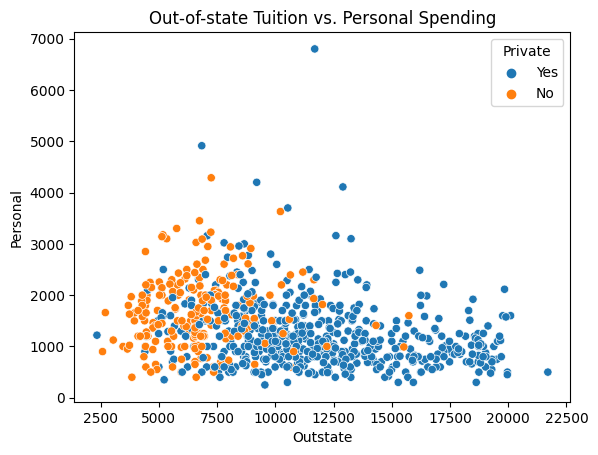

In [ ]:
# Out-of-state Tuition vs. Personal Spending

sns.scatterplot(x='Outstate', y='Personal', hue='Private', data=data)
plt.title('Out-of-state Tuition vs. Personal Spending')
pdf_pages.savefig()

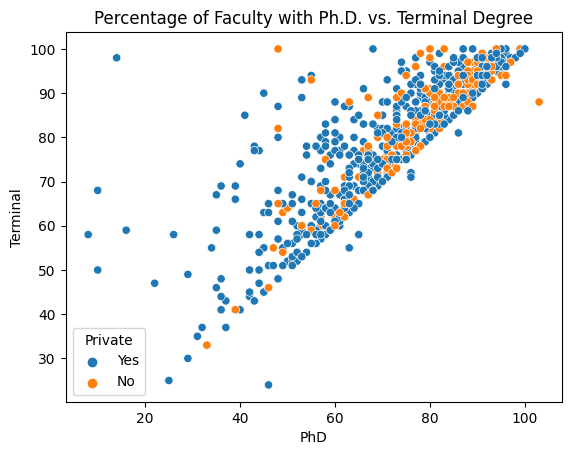

In [ ]:
# Pct. faculty with Ph.D.’s and Pct. faculty with terminal degree

sns.scatterplot(x='PhD', y='Terminal', hue='Private', data=data)
plt.title('Percentage of Faculty with Ph.D. vs. Terminal Degree')
pdf_pages.savefig()

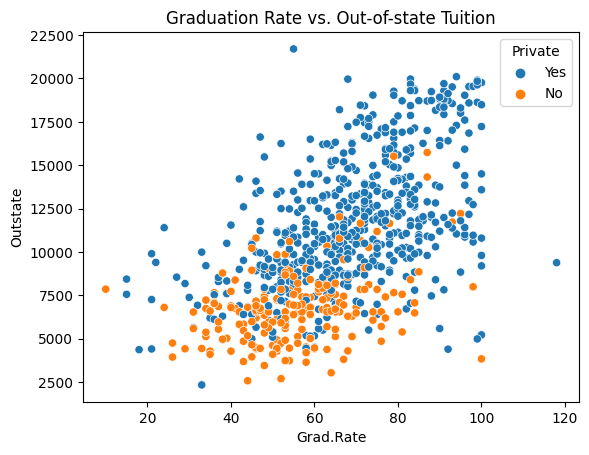

In [ ]:
# Graduation Rate vs. Out-of-state Tuition

sns.scatterplot(x='Grad.Rate', y='Outstate', hue='Private', data=data)
plt.title('Graduation Rate vs. Out-of-state Tuition')
pdf_pages.savefig()

# Predictive Analytics


In [ ]:
#Precdictive analysis about
data = pd.read_csv(r'College_Data.csv')
data


X=data.iloc[:,2:]
X=X.dropna()
X

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [ ]:
data['Private'] = data['Private'].map({'Yes': 1, 'No': 0})
y=data['Private'].values

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    int64  
 1   Accept       777 non-null    int64  
 2   Enroll       777 non-null    int64  
 3   Top10perc    777 non-null    int64  
 4   Top25perc    777 non-null    int64  
 5   F.Undergrad  777 non-null    int64  
 6   P.Undergrad  777 non-null    int64  
 7   Outstate     777 non-null    int64  
 8   Room.Board   777 non-null    int64  
 9   Books        777 non-null    int64  
 10  Personal     777 non-null    int64  
 11  PhD          777 non-null    int64  
 12  Terminal     777 non-null    int64  
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    int64  
 15  Expend       777 non-null    int64  
 16  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16)
memory usage: 103.3 KB


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Assuming 'X' and 'y' are your features and target variable
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Display information about the StratifiedShuffleSplit object
print(sss)
print("Number of splits for training and testing sets:", sss.get_n_splits(X, y))

# Iterate through the splits
for train_index, test_index in sss.split(X, y):
    print("Train indices:", train_index, "Test indices:", test_index)

    # Use the indices to split your data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
Number of splits for training and testing sets: 5
Train indices: [581  89 510 509 654 130 397 333 760 232 273 452 753  22  21 514 103 478
 508 645 475   5 696 485 272 183  51 470 296 533 380 495 730 121 553 574
 525 376 340 775 745  73 587 592 612 626 143 606 401 453  37 331 498 128
 277 323  68 633 393 297 623 761 157 438  58 178 765 615 431 414 367  55
 734 484 413 120 399 415 290 507 708 585 151 325 486 226 572 426 640 176
 721 557 702   9 534 573 728 545 492 582 212 662 669 223 332 472 193 621
 476 609 586 751 245 639  30 528  47 354 439 348  56 211 293 684 266  86
 506 314 456 577 695 647 602 494 599 177 628 661  31 385 288 237 427 764
 501 395 370 437 335 490 477 739 772 559 697 409 649 466 269 596  95 681
 100 540 617 369 598 593 127 115 256  48 449 162 590 220 714 259 180 588
 286 174 330 412 773 769 364 536 656 318 148  80 311 137 279 650   8  27
 444 538 239 447  14 652  84 584 634 

In [ ]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
print(sss)
print("Number of splits for training and testing sets：", sss.get_n_splits(X, y))

for train_index, test_index in sss.split(X, y):
    print("train:", train_index, "test:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None)
Number of splits for training and testing sets： 5
train: [581  89 510 509 654 130 397 333 760 232 273 452 753  22  21 514 103 478
 508 645 475   5 696 485 272 183  51 470 296 533 380 495 730 121 553 574
 525 376 340 775 745  73 587 592 612 626 143 606 401 453  37 331 498 128
 277 323  68 633 393 297 623 761 157 438  58 178 765 615 431 414 367  55
 734 484 413 120 399 415 290 507 708 585 151 325 486 226 572 426 640 176
 721 557 702   9 534 573 728 545 492 582 212 662 669 223 332 472 193 621
 476 609 586 751 245 639  30 528  47 354 439 348  56 211 293 684 266  86
 506 314 456 577 695 647 602 494 599 177 628 661  31 385 288 237 427 764
 501 395 370 437 335 490 477 739 772 559 697 409 649 466 269 596  95 681
 100 540 617 369 598 593 127 115 256  48 449 162 590 220 714 259 180 588
 286 174 330 412 773 769 364 536 656 318 148  80 311 137 279 650   8  27
 444 538 239 447  14 652  84 584 634 218 147 

In [ ]:
Classifiers = [["Random Forest", RandomForestClassifier()],
               ["Support Vector Machine", SVC()],
               ["LogisticRegression", LogisticRegression()],
               ["KNN", KNeighborsClassifier(n_neighbors=5)],
               ["Naive Bayes", GaussianNB()],
               ["Decision Tree", DecisionTreeClassifier()],
               ["AdaBoostClassifier", AdaBoostClassifier()],
               ["GradientBoostingClassifier", GradientBoostingClassifier()],
               ["XGB", XGBClassifier()],
               ["CatBoost", CatBoostClassifier(logging_level='Silent')]
               ]
print('Original data features：', X.shape,
      'Training data features：', X_train.shape,
      'Testing data features：', X_test.shape)

print('Original data labels：', y.shape,
      '   Training data labels：', y_train.shape,
      '   Testing data labels：', y_test.shape)

Original data features： (777, 17) Training data features： (621, 17) Testing data features： (156, 17)
Original data labels： (777,)    Training data labels： (621,)    Testing data labels： (156,)


In [ ]:
Classify_result = []
names = []
prediction = []
for name, classifier in Classifiers:
    classifier = classifier

    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    recall = recall_score(y_test, y_pred)
    ac=accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred, average='macro')

    class_eva = pd.DataFrame([recall, precision,f1,ac])
    Classify_result.append(class_eva)
    name = pd.Series(name)
    names.append(name)
    y_pred = pd.Series(y_pred)
    prediction.append(y_pred)

names = pd.DataFrame(names)
names = names[0].tolist()
result = pd.concat(Classify_result, axis=1)
result.columns = names
result.index = ["recall", "precision","f1","ac"]
result

,Random Forest,Support Vector Machine,LogisticRegression,KNN,Naive Bayes,Decision Tree,AdaBoostClassifier,GradientBoostingClassifier,XGB,CatBoost
recall,0.982301,0.964602,0.955752,0.964602,0.946903,0.982301,0.964602,0.982301,0.982301,0.973451
precision,0.909836,0.900826,0.939130,0.893443,0.877049,0.956897,0.964602,0.925000,0.940678,0.932203
f1,0.887925,0.863248,0.902256,0.853440,0.818956,0.942547,0.935789,0.906775,0.924964,0.908289
ac,0.916667,0.897436,0.923077,0.891026,0.865385,0.955128,0.948718,0.929487,0.942308,0.929487


#Prescriptive Analytics

In [ ]:
# Using a linear regression model to identify factors influencing graduation rates
data = pd.read_csv(r'College_Data.csv')
data

from sklearn.linear_model import LinearRegression



# Convert the 'Private' column to numeric for analysis
data['Private'] = data['Private'].map({'Yes': 1, 'No': 0})

#Drop rows with missing values
data.dropna(inplace=True)

X = data.drop(['Unnamed: 0', 'Grad.Rate'], axis=1)  # Features
y = data['Grad.Rate']  # Target variable

model = LinearRegression()
model.fit(X, y)

# Get the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)



             Coefficient
Private         3.381376
Apps            0.001298
Accept         -0.000696
Enroll          0.002159
Top10perc       0.054896
Top25perc       0.135129
F.Undergrad    -0.000471
P.Undergrad    -0.001484
Outstate        0.001017
Room.Board      0.001914
Books          -0.002220
Personal       -0.001664
PhD             0.087283
Terminal       -0.074702
S.F.Ratio       0.075822
perc.alumni     0.279334
Expend         -0.000456


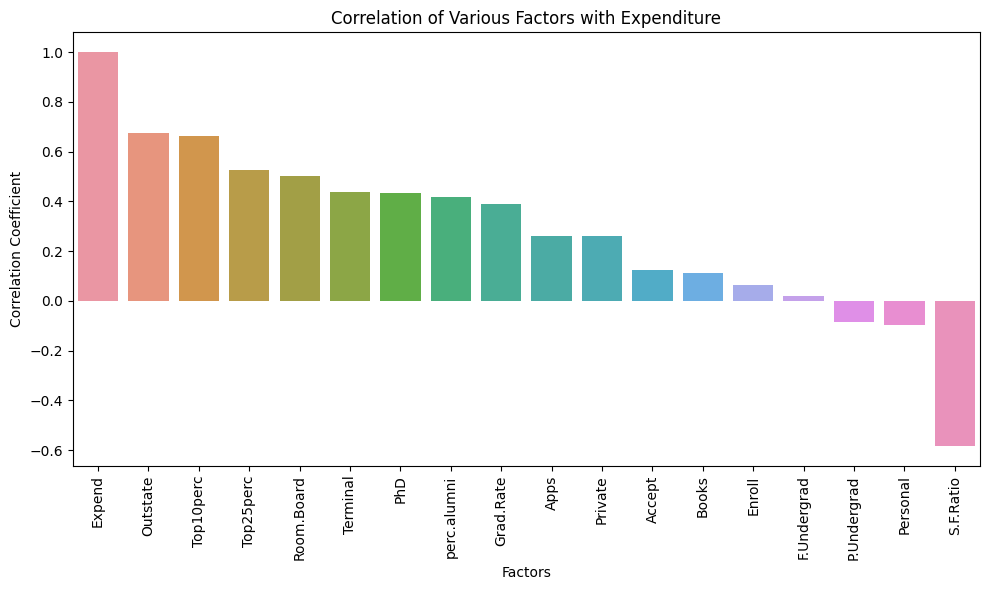

In [ ]:
# Calculating the correlation with Expenditure
expenditure_corr = data.corr()['Expend'].sort_values(ascending=False)

# Visualizing the correlation
plt.figure(figsize=(10,6))
sns.barplot(x=expenditure_corr.index, y=expenditure_corr.values)
plt.xticks(rotation=90)
plt.title("Correlation of Various Factors with Expenditure")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Factors")
plt.tight_layout()
pdf_pages.savefig()
plt.show()


In [ ]:
# Close pdf file

pdf_pages.close()